# Crime Rate in Chicago 2012 - 2017

## Questions
1. Location Discription of a higher number of reported crimes?
2. Number of reported cimes commited annualy in illionis?
3. What are the general trends in the reported crimes from 2012 - 2017?
4. On what days and months are a higher number of crimes reported?
5. what block is the most reported for crimes?
6. What is the most type of crime reported?

In [13]:
import os
print(os.getcwd())

C:\Users\meron\Downloads\projects python


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')
Data.info()

Data.dropna(inplace=True)
Data.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

Unnamed: 0              False
ID                      False
Case Number             False
Date                    False
Block                   False
IUCR                    False
Primary Type            False
Description             False
Location Description    False
Arrest                  False
Domestic                False
Beat                    False
District                False
Ward                    False
Community Area          False
FBI Code                False
X Coordinate            False
Y Coordinate            False
Year                    False
Updated On              False
Latitude                False
Longitude               False
Location                False
dtype: bool

In [9]:
print(Data.head())

   Unnamed: 0        ID Case Number                    Date  \
0           3  10508693    HZ250496  05/03/2016 11:40:00 PM   
1          89  10508695    HZ250409  05/03/2016 09:40:00 PM   
2         197  10508697    HZ250503  05/03/2016 11:31:00 PM   
3         673  10508698    HZ250424  05/03/2016 10:10:00 PM   
4         911  10508699    HZ250455  05/03/2016 10:00:00 PM   

                 Block  IUCR            Primary Type              Description  \
0   013XX S SAWYER AVE  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
1   061XX S DREXEL AVE  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
2  053XX W CHICAGO AVE  0470  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT   
3    049XX W FULTON ST  0460                 BATTERY                   SIMPLE   
4    003XX N LOTUS AVE  0820                   THEFT           $500 AND UNDER   

  Location Description  Arrest  ...  Ward  Community Area  FBI Code  \
0            APARTMENT    True  ...  24.0            29.0      

In [17]:
Data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [18]:
Data.info

<bound method DataFrame.info of          Unnamed: 0        ID Case Number                    Date  \
0                 3  10508693    HZ250496  05/03/2016 11:40:00 PM   
1                89  10508695    HZ250409  05/03/2016 09:40:00 PM   
2               197  10508697    HZ250503  05/03/2016 11:31:00 PM   
3               673  10508698    HZ250424  05/03/2016 10:10:00 PM   
4               911  10508699    HZ250455  05/03/2016 10:00:00 PM   
...             ...       ...         ...                     ...   
1456709     6250330  10508679    HZ250507  05/03/2016 11:33:00 PM   
1456710     6251089  10508680    HZ250491  05/03/2016 11:30:00 PM   
1456711     6251349  10508681    HZ250479  05/03/2016 12:15:00 AM   
1456712     6253257  10508690    HZ250370  05/03/2016 09:07:00 PM   
1456713     6253474  10508692    HZ250517  05/03/2016 11:38:00 PM   

                        Block  IUCR            Primary Type  \
0          013XX S SAWYER AVE  0486                 BATTERY   
1          06

### Converting datatypes to required format

In [31]:
#converting Date( currently in string format) to datetime format to perform analysis
Data['Date'] = pd.to_datetime(Data['Date'])
print(Data['Date'])

0         2016-05-03 23:40:00
1         2016-05-03 21:40:00
2         2016-05-03 23:31:00
3         2016-05-03 22:10:00
4         2016-05-03 22:00:00
                  ...        
1456709   2016-05-03 23:33:00
1456710   2016-05-03 23:30:00
1456711   2016-05-03 00:15:00
1456712   2016-05-03 21:07:00
1456713   2016-05-03 23:38:00
Name: Date, Length: 1418365, dtype: datetime64[ns]


### Data Analysis + Visualization

#### Question 1: Location Discription of a higher number of reported crimes?

In [23]:
location_counts = Data['Location Description'].value_counts()

highest_crime_location = location_counts.idxmax() # returns the index label(s) associated with the maximum value.
highest_crime_count = location_counts.max() #returns the maximum value within that data structure.

print(f"The location description with the highest number of reported crimes is '{highest_crime_location}' with {highest_crime_count} occurrences.")

The location description with the highest number of reported crimes is 'STREET' with 325084 occurrences.


#### Question 2: Number of reported crimes commited annualy in illinois?

In [36]:
# specifying the date format, the dates are in a specific format
Data['Date'] = pd.to_datetime(Data['Date'], format='%Y/%m/%d %H:%M:%S')

# Grouped  by 'Year' and count occurrences to find the number of reported crimes annually
annual_crime_count = Data['Year'].value_counts().sort_index()

print("Number of reported crimes committed annually in Illinois:")
print(annual_crime_count)

Number of reported crimes committed annually in Illinois:
Year
2012    334397
2013    304267
2014    269329
2015    259610
2016    250732
2017        30
Name: count, dtype: int64


#### Question 3: What are the general trends in the reported crimes from 2012 - 2017?

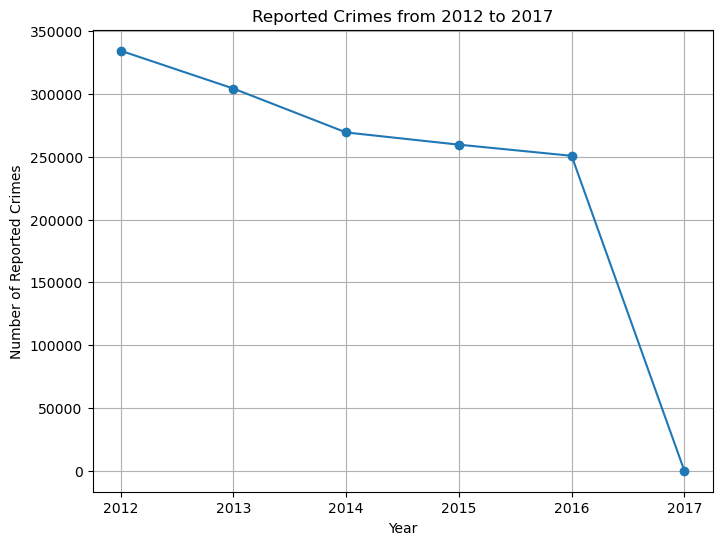

In [39]:
filtered_data = Data[(Data['Year'] >= 2012) & (Data['Year'] <= 2017)]

annual_crime_count = filtered_data['Year'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.plot(annual_crime_count.index, annual_crime_count.values, marker='o', linestyle='-')
plt.title('Reported Crimes from 2012 to 2017')
plt.xlabel('Year')
plt.ylabel('Number of Reported Crimes')
plt.grid(True)
plt.show()

#### Question 4: On what days and months are a higher number of crimes reported?

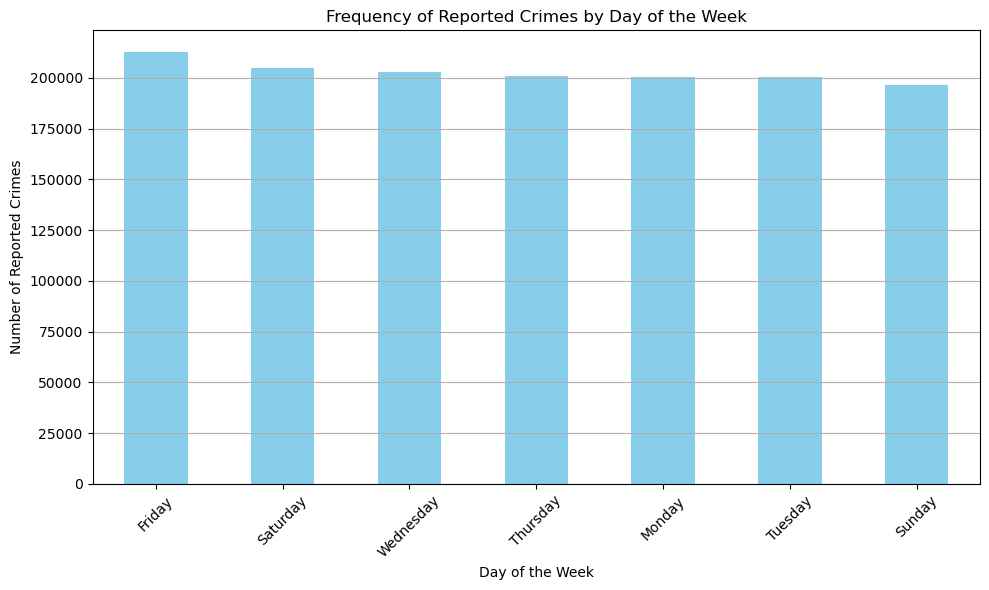

In [42]:
# got day of week and month from Date column 
Data['DayOfWeek'] = Data['Date'].dt.day_name()
Data['Month'] = Data['Date'].dt.month_name()

daywise_crime_count = Data['DayOfWeek'].value_counts() # report by the week

monthwise_crime_count = Data['Month'].value_counts() # report by the month

plt.figure(figsize=(10, 6))
daywise_crime_count.plot(kind='bar', color='skyblue')
plt.title('Frequency of Reported Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Reported Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Question 5: what block is the most reported for crimes?

In [49]:
block_crime_counts = Data['Block'].value_counts()

most_reported_block = block_crime_counts.idxmax()
number_reported_block = block_crime_counts.max()
print(f"The block with the most reported is '{most_reported_block}'with {number_reported_block} reported crimes.")


The block with the most reported is '001XX N STATE ST'with 3567 reported crimes.


#### Question 6: What is the most type of crime reported?

In [54]:
Type_crime_report = Data['Primary Type'].value_counts()

most_reported_crime = Type_crime_report.idxmax()
number_reported_crime = Type_crime_report.max()
print(f"The most reported type crime is:{most_reported_crime}")
print(f"The amount of times it was reported is:{number_reported_crime}")

The most reported type crime is:THEFT
The amount of times it was reported is:321950
